In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gnome_scores_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/genome_scores.csv')
gnome_tag_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/genome_tags.csv')
movie_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/movie.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/rating.csv')
tag_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/tag.csv')

# EDA

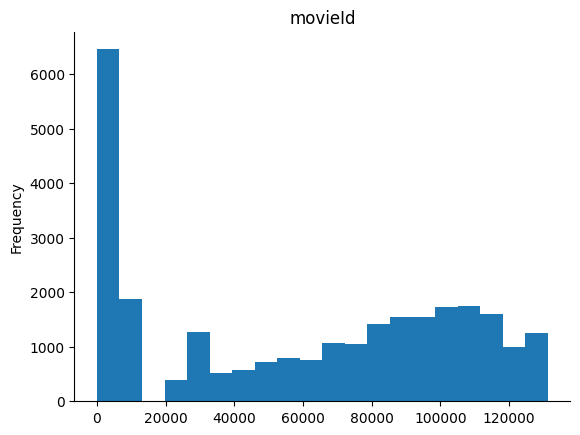

In [36]:
movie_df['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

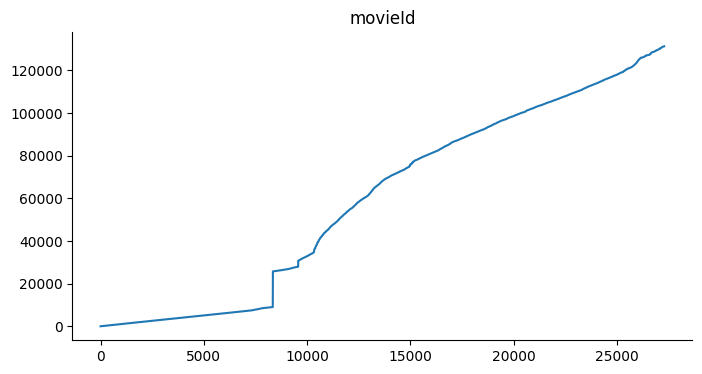

In [37]:
movie_df['movieId'].plot(kind='line', figsize=(8, 4), title='movieId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
x = rating_df['userId'].value_counts() > 500
x_test = x[124643:]
x = x[:124642]
y = x[x].index

In [5]:
rating_df = rating_df[rating_df['userId'].isin(y)]

In [6]:
rating_df

,userId,movieId,rating,timestamp
960,11,1,4.5,2009-01-02 01:13:41
961,11,10,2.5,2009-01-02 01:15:59
962,11,19,3.5,2009-01-01 04:21:44
963,11,32,5.0,2009-01-01 04:11:35
964,11,39,4.5,2009-01-02 01:17:12
...,...,...,...,...
19998294,138474,5401,1.0,2002-07-26 02:47:55
19998295,138474,5449,4.0,2002-07-26 02:47:02
19998296,138474,5459,4.0,2002-07-26 02:47:55
19998297,138474,5460,5.0,2002-07-26 02:47:02


In [7]:
movie_details_df = movie_df.merge(rating_df, on='movieId')

In [8]:
movie_details_df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0,2001-07-04 07:02:29
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0,2000-11-21 21:00:21
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,2006-04-03 10:00:08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0,2005-03-22 22:46:02


In [9]:
movie_details_df.drop(columns=['timestamp'], inplace=True)

In [10]:
number_rating = movie_details_df.groupby('title')['rating'].count().reset_index()

In [11]:
df = movie_details_df.merge(number_rating, on='title')

In [12]:
df = df[df['rating_y']>=50]

In [13]:
df.drop_duplicates(['title', 'userId'], inplace=True)

In [14]:
df.head(5)

,movieId,title,genres,userId,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,6303
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0,6303
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0,6303
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,6303
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0,6303


In [15]:
df.drop(columns=['rating_y'],inplace=True)

In [16]:
df['rating'] = df['rating_x'].astype(int)

In [17]:
movie_pivot = df.pivot_table(columns='userId', index='title', values='rating')

In [18]:
movie_pivot.fillna(0, inplace=True)

In [19]:
movie_pivot

userId,11,24,54,58,91,104,116,134,156,208,...,138270,138301,138307,138325,138382,138397,138406,138411,138437,138474
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,4.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from scipy.sparse import csr_matrix
movie_sparse = csr_matrix(movie_pivot)

In [21]:
movie_sparse.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 2., 0., 4.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 3., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=7, algorithm='brute', metric='cosine')

In [23]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [24]:
df.drop(columns=['genres', 'userId', 'rating'], inplace=True)

In [25]:
df.drop_duplicates(inplace=True)

In [43]:
distance_list = []
for user in range(1, 100):
  distances, suggestions = model.kneighbors(movie_pivot.iloc[user, :].values.reshape(1, -1))
  distance_list.append(distances)

In [44]:
suggestions

array([[  99, 8980,  756, 4668, 8050, 2674, 7571]])

# Average Similarity across 100 users

In [46]:
1 - np.array(distance_list).mean()

0.48532354670391886